# *LetsGrowMore - Virtual Internship Program*
#### *Data Science Tasks*

### *Author: Laxman Kumar*

### Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

Datasetlink : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

***

# Import modules

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

# Loading the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df = df.iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


# Data Processing

In [4]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
df.shape

(2035, 8)

In [6]:
df_high = df.reset_index()['High']

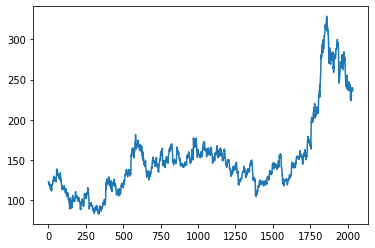

In [7]:
plt.plot(df_high)

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [9]:
df_high.shape

(2035, 1)

In [10]:
df_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

# Split the Data

In [11]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [12]:
training_size,test_size

(1526, 509)

In [13]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [15]:
#Reshape the input to be [samples, time steps, features]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [16]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [17]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

# Create the LSTM Model

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 24s 455ms/step - loss: 0.0105 - val_loss: 0.0317
Epoch 2/100
23/23 [==============================] - 9s 405ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 3/100
23/23 [==============================] - 9s 403ms/step - loss: 7.7935e-04 - val_loss: 0.0030
Epoch 4/100
23/23 [==============================] - 9s 402ms/step - loss: 7.3122e-04 - val_loss: 0.0027
Epoch 5/100
23/23 [==============================] - 9s 403ms/step - loss: 7.1883e-04 - val_loss: 0.0031
Epoch 6/100
23/23 [==============================] - 9s 403ms/step - loss: 6.8171e-04 - val_loss: 0.0029
Epoch 7/100
23/23 [==============================] - 9s 403ms/step - loss: 6.9688e-04 - val_loss: 0.0024
Epoch 8/100
23/23 [==============================] - 9s 404ms/step - loss: 6.6434e-04 - val_loss: 0.0044
Epoch 9/100
23/23 [==============================] - 9s 403ms/step - loss: 6.1436e-04 - val_loss: 0.0039
Epoch 10/100
23/23 [==============================] - 9s 411ms

23/23 [==============================] - 9s 404ms/step - loss: 1.1425e-04 - val_loss: 0.0012
Epoch 79/100
23/23 [==============================] - 9s 402ms/step - loss: 1.1843e-04 - val_loss: 0.0012
Epoch 80/100
23/23 [==============================] - 9s 402ms/step - loss: 1.2063e-04 - val_loss: 9.8861e-04
Epoch 81/100
23/23 [==============================] - 9s 402ms/step - loss: 1.2078e-04 - val_loss: 0.0018
Epoch 82/100
23/23 [==============================] - 9s 401ms/step - loss: 1.2329e-04 - val_loss: 0.0011
Epoch 83/100
23/23 [==============================] - 9s 401ms/step - loss: 1.1450e-04 - val_loss: 0.0013
Epoch 84/100
23/23 [==============================] - 9s 402ms/step - loss: 1.2087e-04 - val_loss: 0.0020
Epoch 85/100
23/23 [==============================] - 9s 402ms/step - loss: 1.1616e-04 - val_loss: 0.0012
Epoch 86/100
23/23 [==============================] - 9s 400ms/step - loss: 1.1880e-04 - val_loss: 0.0015
Epoch 87/100
23/23 [==============================] - 9

In [21]:
#predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [22]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [23]:
#RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

136.7503276735856

In [24]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

228.665220946656

# Plotting

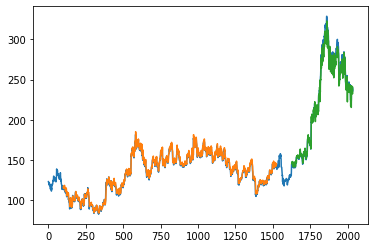

In [25]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [27]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [28]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [29]:
lst_output = []
n_steps = 100
nextNumberOfDays = 28
i = 0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
        
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        
        lst_output.extend(yhat.tolist())
        i = i+1
    

print(lst_output)

[0.6169637]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

8 day output [[0.5585653]]
9 day input [0.67310429 0.68428542 0.68936776 0.70217524 0.71803212 0.72941655
 0.73144948 0.74486684 0.76926205 0.75991055 0.74242732 0.73958122
 0.74771295 0.75991055 0.7584875  0.76621264 0.75462492 0.76316324
 0.79670665 0.80585485 0.7889815  0.78003659 0.73978451 0.73002643
 0.73490547 0.74872942 0.75991055 0.75462492 0.75401504 0.76174019
 0.7737345  0.82008538 0.80585485 0.81154706 0.77434438 0.78633869
 0.79284407 0.78328929 0.77109169 0.74385038 0.71193332 0.68733482
 0.67818662 0.65257166 0.64301687 0.65643423 0.67656028 0.67371417
 0.65114861 0.65521447 0.66761537 0.67838992 0.69993901 0.63122586
 0.63508843 0.64098394 0.64545639 0.64118723 0.63854442 0.63081927
 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537 0.66720878
 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281 0.62817646
 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629 0.57613336
 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257 0.6361049
 0.62776987 0.6269567  0

16 day output [[0.5468231]]
17 day input [0.76926205 0.75991055 0.74242732 0.73958122 0.74771295 0.75991055
 0.7584875  0.76621264 0.75462492 0.76316324 0.79670665 0.80585485
 0.7889815  0.78003659 0.73978451 0.73002643 0.73490547 0.74872942
 0.75991055 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538
 0.80585485 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929
 0.77109169 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166
 0.64301687 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447
 0.66761537 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394
 0.64545639 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555
 0.64728603 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987
 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813
 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264
 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567
 0.63590161 0.62594023 0.6391543  0.62614353 0.62268754 0.61696368
 0.60360485 0.59036285 

24 day output [[0.5327715]]
25 day input [0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0.57979264 0.57288067 0.62573694
 0.63102257 0.6361049  0.62776987 0.6269567  0.63590161 0.62594023
 0.6391543  0.62614353 0.62268754 0.61696368 0.60360485 0.59036285
 0.57972258 0.57232982 0.56714392 0.56339544 0.56063628 0.55856532
 0.55693084 0.55552197

In [30]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [31]:
day_new.shape

(100,)

In [32]:
day_pred.shape

(28,)

In [33]:
df3 = df_high.tolist()
df3.extend(lst_output)

In [34]:
len(df_high)

2035

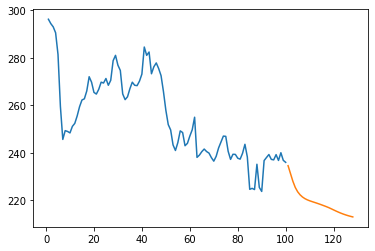

In [35]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

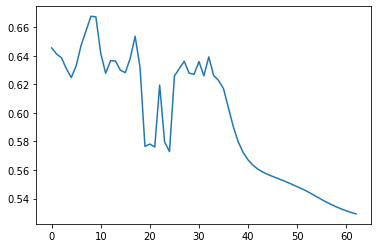

In [36]:
df3 = df_high.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [37]:
df3 = scaler.inverse_transform(df3).tolist()

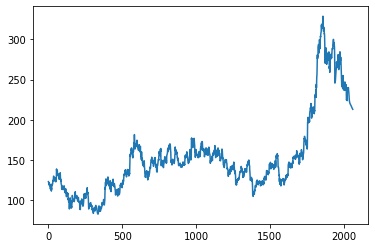

In [38]:
plt.plot(df3)